# YIN'S CAPITAL: X.A.I. INITIATIVE

A field of artificial intelligence initiated by DARPA is called Explainable Artificial Intelligence (XAI). According to their [site](https://www.darpa.mil/program/explainable-artificial-intelligence), dramatic success in machine learning has led to a torrent of Artificial Intelligence (AI) applications. Continued advances promise to produce autonomous systems that will perceive, learn, decide, and act on their own. However, the effectiveness of these systems is limited by the machine’s current inability to explain their decisions and actions to human users.

The Explainable AI (XAI) Initiative aims to create a suite of machine learning techniques that:

- Produce more explainable models, while maintaining a high level of learning performance (prediction accuracy); and 

- Enable human users to understand, appropriately trust, and effectively manage the emerging generation of artificially intelligent partners.

This notebook Yin's Capital takes the first step in our R&D process to move along this direction. We start with grid data type. This means the following: 

- in the case that the number of variables in the data frame can be broken down to multiplication of two digits, we simply use these two digits to create grid structure, i.e. if number of variable is 100, each observation we create a grid structure of 10 by 10 (sometimes can be more if including permutation)

- in the case that the number of variables in the data frame cannot be broken down to multiplication of two digits (other than one and itself), we add in zero vectors to form a grid structure, i.e. if number of variable is 101, each observation we add 19 zero vectors so the total number of variable is 120 and this can broken into 10 by 12 of grid structure.

This generalized way of thinking can allow us to process all data frame in grid structures. What is left is to construct machines to learn from the data to extract predictable patterns. This relies heavily on fruitful amount of sample size and successful feature capturing technology.

In the essence of all these machine learning steps described above, traditional methods consist of creating convolutional layers from original data frame and rely on backpropagation to update the belief of classifiers hoping to deliver high performance. While functional performance has been seen, it still lacks the capability to explain which part of the data helps the prediction performance. Convolutional operation requires a filter to be applied on **each part** of the grid structure. If a grid structure has size 10 by 10 and the filter has size 2 by 2, convolutional operation will create 9 by 9 output features. We have no theoretical reason to believe which of these 9 by 9 features contribute the most to the performance (even good performance).

### Data in Picture Form

Let us take a look at a random matrix in image form. In this case, we simply generate 25 random values in a grid structure, i.e. 5 by 5. Then we present the image.

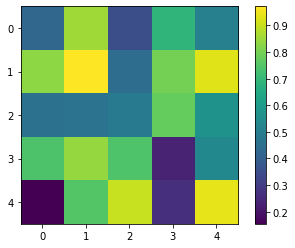

In [232]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.random.random((5,5)));
plt.colorbar()
plt.show()

Let us print the matrix to remind us what the data is.

In [233]:
# create 25 random numbers
np.random.random((25))

array([0.85885883, 0.5945743 , 0.82245682, 0.16720957, 0.54536861,
       0.69073442, 0.8101561 , 0.13618506, 0.98909967, 0.73983519,
       0.04383766, 0.19307597, 0.76766225, 0.77512   , 0.22584967,
       0.79533169, 0.03875406, 0.60041781, 0.32473037, 0.19580141,
       0.59303856, 0.19458917, 0.34666914, 0.4584473 , 0.46791597])

In [234]:
# create random numbers in shape 2 by 3
np.random.random((2, 3))

array([[0.90332027, 0.65151576, 0.52133276],
       [0.65460275, 0.67539391, 0.28791475]])

### Artificial Example

Let us simulate an artificial example using two-module example. Let us consider this matrix in image form. The reason to select this underlying model is (1) there is no linearity, (2) there is no marginal signal, (3) there is no correlation among variables, (4) there is higher-order interactions which happen quite often in practice.

Draw random variables from Bernoulli distribution and create data $X_1, ..., X_p$ and define underyling model to be
$$y = \left\{
\begin{matrix}
X_1 + X_2 & (\text{mod } 2) \\
X_3 + X_4 + X_5 & (\text{mod } 2) \\
\end{matrix}
\right.
$$

The goal of this example is correct model specification. 

We want to capture the important information and in this case we want the two variable modules. If we can successfully capture the important variable modules, we do not even need to worry about what type of machine learning algorithm to choose.

The correct prediction rate is 75%. Why 75%? This is the exact theoretical prediction rate of the artificial example. In the underlying model $Y$, there are two modules. One of the correct module gives us at least 50% to start with. Since there is no marginal signal, the first module will perform 50% on the rest of the observations. This means correct theoretical prediction rate (the best you can do) is $75\% = 50\% + 50\% \times 50\%$). 

In [235]:
from scipy.stats import bernoulli
import pandas as pd
import numpy as np

In [236]:
n = 2000
p = 32*32
train_images = np.reshape(np.random.binomial(1, 1/2, n*p), (n, 32 * 32))
train_labels_module_1 = np.mod(train_images[:, 1] + train_images[:, 2], 2)
train_labels_module_2 = np.mod(train_images[:, 2] + train_images[:, 3] + train_images[:, 4], 2)
train_labels = np.where((np.random.binomial(1, 1/2, n)) == 1, train_labels_module_1, train_labels_module_2)
test_images = np.reshape(np.random.binomial(1, 1/2, n*p), (n, 32 * 32))
test_labels_module_1 = np.mod(test_images[:, 1] + test_images[:, 2], 2)
test_labels_module_2 = np.mod(test_images[:, 2] + test_images[:, 3] + test_images[:, 4], 2)
test_labels = np.where((np.random.binomial(1, 1/2, n)) == 1, test_labels_module_1, test_labels_module_2)

In [237]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((2000, 1024), (2000,), (2000, 1024), (2000,))

In [238]:
train_images = np.reshape(train_images, (2000, 32, 32, 1))
test_images = np.reshape(test_images, (2000, 32, 32, 1))

In [239]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((2000, 32, 32, 1), (2000,), (2000, 32, 32, 1), (2000,))

Let us take a look at the 1st observation (1st row) in the data frame and we print the data in image form.

In [240]:
np.reshape(train_images[0,:], (32, 32))

array([[0, 1, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 1, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 1, 0]])

Class: 1


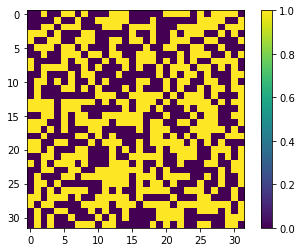

In [241]:
which_obs = 1
print("Class:", train_labels[which_obs])
plt.imshow(np.reshape(train_images[which_obs, :], (32, 32)))
plt.colorbar()
plt.show()

Let us take a look at the 2nd observation (2nd row) in the data frame and we print the datda in image form. From class 0 to class 1, we cannot really detect any patterns using our eyes.

### Feature Engineer and Machine Learning

Load **YinDL** script to import the package written by author.

In [205]:
%run "../scripts/YinsDL.py"

---------------------------------------------------------------------

        Yin's Deep Learning Package 
        Copyright © YINS CAPITAL, 2009 – Present
        For more information, please go to www.YinsCapital.com
        
---------------------------------------------------------------------


In [ ]:
# Run Convolutional Neural Network: C1NN3
# Reminder: check dimension of input X and Y for training and test set
#           and make sure the dimension makes sense with input shape width and length
cnnTmpResult = YinsDL.C1NN3_Classifier(
    train_images, train_labels,
    test_images, test_labels,
    inputSHAPEwidth=32, inputSHAPElenth=32,
    filter1 = [[1,0], [0,1]],
    l1_act='relu', l2_act='relu', l3_act='softmax',
    layer1size=128, layer2size=64, layer3size=2,
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    num_of_epochs=50,
    plotROC=True,
    verbose=True)

### Feature Engineer with Smart Filtering 

We do not quite hit that 75% we discussed in the beginning of the script.

Let us play around with the filter. Notice that the filter is defined as 
$$
\begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}
$$
and this is completely arbitrary. Though the algorithm runs fine, the prediction results has not been great. This is because as the variable $[X_1, X_2, X_3, X_4]$ line up and are inserted in a square. The filter will actually pick up $X_1$ and $X_3$ which is not quite the correct model. 

However, we can design the following filter
$$
\begin{bmatrix}
1 & 1 \\
1 & 0 \\
\end{bmatrix}
$$
and this should be able to pick up some signal due to the positioning of variables in the grid. However, this observation is not replicable because I already know what the data looks like. In reality, one needs high computing power to search for the ideal filter.

Tensorflow Version:
2.0.0
Shapes of X in training set (1000, 10, 6) Shapes of X in test set: (1000, 10, 6)
Summary of Network Architecture:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               5888      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 14,274
Trainable params: 14,274
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 0s 70us/sample - loss: 0.8312 - accuracy: 0.5060
Epoch 2/50
1000/1000 [==============================] - 0s 34us/sample - loss: 0.6667 - accuracy: 0.6110
Epoch 3/

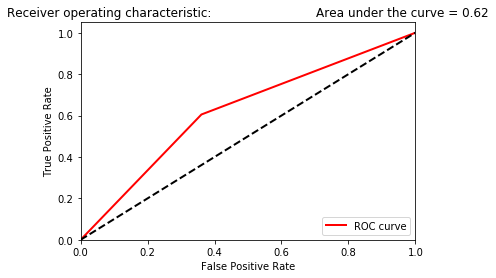

In [11]:
cnnTmpResult = YinsDL.C1NN3_Classifier(
        pd.concat([X_train, X_train], axis=1), y_train, 
        pd.concat([X_test, X_test], axis=1), y_test, 
        inputSHAPEwidth=10, inputSHAPElenth=6,
        filter1 = [[1,1], [1,0]],
        l1_act='relu', l2_act='relu', l3_act='softmax',
        layer1size=128, layer2size=64, layer3size=2,
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
        num_of_epochs=50,
        plotROC=True,
        verbose=True)

We observe that some information can be captured if we try a different filter. This is because the position of how variables are put together. In other words, in practice we would need to try lots of filters with lots of different shapes to be able to find that very one that fits.

In [176]:
X_train.shape

(1000, 30)

In [177]:
newDataGenerated = YinsDL.ConvOperationC1(
        X_train, y_train, X_test, y_test, 
        inputSHAPEwidth=3, inputSHAPElenth=10,
        filter1 = [[1,1], [0,0]], 
        verbose=True, printManual=True)

----------------------------------------------------------------------
Manual

                This script input X_train, y_train, X_test, y_test with selected input width and height 
                as well as a filter. Then the script executes convolutional operation to compute new 
                features from combination of original variables and the filter.

                Note: the filter plays crucial role which is why this function the filter is user-friendly
                      and can be updated as the user see fits.
                
                # Run
                newDataGenerated = YinsDL.ConvOperationC1(
                        X_train, y_train, X_test, y_test, 
                        inputSHAPEwidth=10, inputSHAPElenth=3,
                        filter1 = [[1,0], [0,1]], 
                        verbose=True, printManual=True)
                
----------------------------------------------------------------------
Tensorflow Version:
2.0.0
Shapes of X in trainin

In [178]:
# 'Data': [X_train, y_train, X_test, y_test, X_train_new, X_test_new]
# Index:      0        1         2      3          4            5
X_train = newDataGenerated['Data'][4]
y_train = newDataGenerated['Data'][1]
X_test = newDataGenerated['Data'][5]
y_test = newDataGenerated['Data'][3]

In [180]:
X_train.shape, X_test.shape

((1000, 18), (1000, 18))

In [181]:
def helpDiscretize(X):
    return (X > X.mean()).astype(int)

In [182]:
X_train = X_train.apply(helpDiscretize, axis=1)
X_test = X_test.apply(helpDiscretize, axis=1)

In [183]:
X_train.shape, X_test.shape

((1000, 18), (1000, 18))

In [184]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1
0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,0,0,1,1
0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,0,0
0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
0,1,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0


In [185]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,0,1,1,1,1,0,1,0,1,1,1,0,0,1,1,0
0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,0,0
0,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,0
0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,1,1
0,1,1,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1


In [14]:
%run "../scripts/InteractionBasedLearning.py"

---------------------------------------------------------------------

        Yin's Interaction-based Learning Statistical Package 
        Copyright © YINS CAPITAL, 2009 – Present
        For more information, please go to www.YinsCapital.com
        
README:
This script has the following functions:

    (1) iscore(): this function computes the I-score of selected X at predicting Y
    (2) BDA(): this function runs through Backward Dropping Algorithm once
    (3) InteractionLearning(): this function runs many rounds of BDA and 
                               finalize the variables selcted according to I-score
    
---------------------------------------------------------------------


In [186]:
pd.concat([X_train, X_test]).shape, len(np.concatenate([y_train, y_test]))

((2000, 18), 2000)

In [197]:
tmpResult = InteractionBasedLearning.InteractionLearning(
    newX=pd.concat([X_train, X_test]),
    y=np.concatenate([y_train, y_test]),
    testSize=0.5,
    num_initial_draw=7,
    total_rounds=100,
    top_how_many=3,
    nameExists=False,
    TYPE=int,
    verbatim=True)

100%|██████████████████████████████████████████| 100/100 [01:18<00:00,  1.27it/s]


Time Consumption (in sec): 78.66
Time Consumption (in min): 1.31
Time Consumption (in hr): 0.02


In [198]:
tmpResult['Brief'].head()

,Modules,Score
90,"[[1, 3, 5]]",4.218812
56,"[[1, 6, 12]]",3.970244
11,"[[1, 17]]",3.946381
21,"[[1, 5, 12]]",3.940480
60,"[[1, 12]]",3.717148


In [199]:
tmpResult['New Data'].head(), tmpResult['New Data'].shape

(   1   3   5         0   1   6   12        0   1   17        0 
 0   1   1   1  0.575000   1   1   1  0.606383   1   1  0.553539
 1   1   0   0  0.272727   1   0   1  0.511628   1   1  0.553539
 2   0   0   0  0.642633   0   1   1  0.350211   0   0  0.582011
 3   1   0   0  0.272727   1   0   0  0.307407   1   1  0.553539
 4   1   0   0  0.272727   1   0   0  0.307407   1   0  0.404651, (2000, 11))

Class: 0


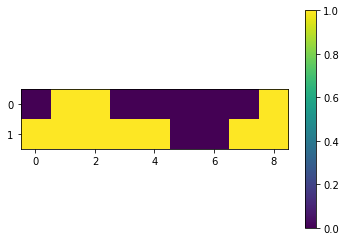

In [190]:
print("Class:", y_train[1])
plt.imshow(np.reshape(np.array(X_train.iloc[1, :]), (2, 9)));
plt.colorbar()
plt.show()

Class: 0


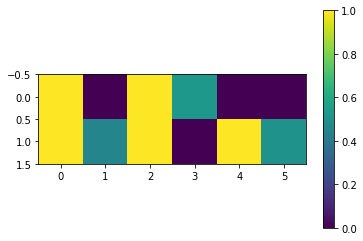

In [192]:
print("Class:", y_train[1])
plt.imshow(np.reshape(np.concatenate([np.array(tmpResult['New Data'].iloc[0, :])]), (2, 6)));
plt.colorbar()
plt.show()

In [131]:
X_train_cp.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
103,0,0,1,1,0,0,0,0,1,0,...,1,1,1,0,1,0,0,0,0,1
1638,1,0,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,1,1,0,1
60,0,0,0,1,1,0,0,0,0,1,...,1,1,0,1,0,1,0,1,1,1
784,1,1,1,1,0,0,0,1,1,1,...,0,0,1,1,0,0,0,0,1,0
1084,0,1,1,0,1,1,0,0,1,0,...,1,0,1,1,0,0,1,0,0,0


In [132]:
print(f"The first variable module selected:")
print(tmpResult['New Data'].columns)

The first variable module selected:
Int64Index([11,  0,  2,  8,  0,  9, 13, 16,  0,  2, 10, 12,  0,  6,  7, 17,  0,
             8, 10, 15,  0,  8,  0,  1,  5, 10,  0,  5, 10,  0,  6,  7, 10,  0,
             4,  0,  6,  7,  0,  2, 10, 14, 15,  0,  0,  1, 10, 12,  0,  2, 12,
            14, 15,  0],
           dtype='int64')


Feature No. 1


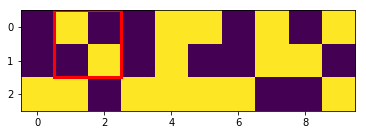

In [201]:
print('Feature No.', tmpResult['New Data'].columns[0])
YinsDL.plotOneImage(
    initialPosX = 0.5,
    initialPosY = -0.5,
    boxWidth    = 2,
    boxHeight   = 2,
    linewidth   = 3,
    edgecolor   = 'r',
    IMAGE       = np.reshape(np.array(X_train_cp.head(1)), (3, 10)))

According to **tmpResult['New Data'].head()**, proposed method showed that the most important feature from data is the 11th convolutional feature. We retrace back to that 2 by 2 grid and print a box surrounding it. We clearly see that the box covers 

In [202]:
tmpResult['New Data'].head(), tmpResult['New Data'].shape

(   1   3   5         0   1   6   12        0   1   17        0 
 0   1   1   1  0.575000   1   1   1  0.606383   1   1  0.553539
 1   1   0   0  0.272727   1   0   1  0.511628   1   1  0.553539
 2   0   0   0  0.642633   0   1   1  0.350211   0   0  0.582011
 3   1   0   0  0.272727   1   0   0  0.307407   1   1  0.553539
 4   1   0   0  0.272727   1   0   0  0.307407   1   0  0.404651, (2000, 11))

In [203]:
len(y)

2000

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tmpResult['New Data'], y, test_size=0.5, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train[:5])

(1000, 11) (1000, 11)
[1 0 0 0 0]


Tensorflow Version:
2.0.0
Summary of Network Architecture:
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 256)               3072      
_________________________________________________________________
dense_61 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_62 (Dense)             (None, 2)                 258       
Total params: 36,226
Trainable params: 36,226
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
Epoch 1/150
1000/1000 [==============================] - 0s 197us/sample - loss: 0.7255 - accuracy: 0.4540
Epoch 2/150
1000/1000 [==============================] - 0s 100us/sample - loss: 0.7204 - accuracy: 0.5270
Epoch 3/150
1000/1000 [==============================] - 0s 100us/sample - loss: 0.7

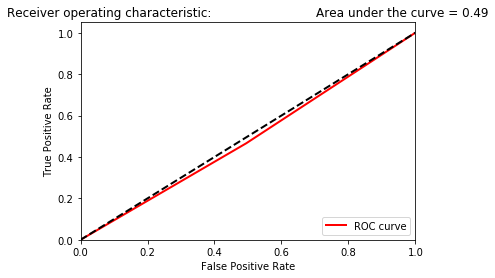

In [210]:
testresult = YinsDL.NN3_Classifier(
    X_train, y_train, X_test, y_test, 
    l1_act='relu', l2_act='relu', l3_act='softmax',
    layer1size=128*2, layer2size=64*2, layer3size=2,
    num_of_epochs=150, plotROC=True, verbose=True)

### XAI Initiative: Feature Selection + Feature Engineer + Classifier Construction

We can observe the application of convolutional operation do not necessarily add values to the machine learning process. If there is fruitful amount of sample size, this operation may lead to finer search to allow us to update our beliefs in the classifiers. However, in this example, the underlying model is extremely difficult and the model is designed to strip away the capability for convolutionals to perform well due to no marginal signals. 

In this case, it makes more sense to work on our features first before we build classifiers. Under this direction, the philosophy of XAI is specifically reflected because we are not randomly building new features to blind our judgement of marginal values or marginal noises injected into the data set. Instead we are extracting useful features (a subset of our data) to build new features and classifiers. This allows training to be much more precise and efficient. 

In [12]:
X_train.shape, X_test.shape, pd.concat([X_train, X_test]).shape, len(np.concatenate([y_train, y_test]))

((1000, 30), (1000, 30), (2000, 30), 2000)

In [16]:
pd.concat([X_train, X_test]).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
103,0,1,1,0,1,1,1,1,0,1,...,1,1,0,0,1,0,0,1,1,0
1638,1,1,1,0,1,0,0,1,1,0,...,0,1,1,0,0,0,0,0,0,0
60,1,0,1,0,1,0,1,1,1,0,...,0,0,0,1,1,1,1,0,0,0
784,0,0,0,0,1,1,0,1,1,0,...,1,0,1,1,1,1,0,1,1,0
1084,0,1,1,0,1,1,0,0,1,1,...,0,1,0,0,1,0,0,1,1,0


In [17]:
tmpResult = InteractionBasedLearning.InteractionLearning(
    newX=X,
    y=y,
    testSize=cutoff,
    num_initial_draw=9,
    total_rounds=200,
    top_how_many=2,
    nameExists=False,
    TYPE=str,
    verbatim=True)

100%|██████████████████████████████████████████| 200/200 [04:40<00:00,  1.40s/it]


Time Consumption (in sec): 280.18
Time Consumption (in min): 4.67
Time Consumption (in hr): 0.08


In [18]:
tmpResult['Brief'].head()

,Modules,Score
135,"[[1, 2]]",30.712665
76,"[[2, 3, 4]]",17.447133
88,"[[0, 10, 22]]",2.139215
152,"[[10, 29]]",2.130670
113,"[[22, 23]]",1.920729


What does this table mean? The table says there are a list of variable modules ranked and we can interpret the ranking results to be how important they are at predicting $Y$.

What do they look like?

Feature: 
    Modules      Score
0  [[1, 2]]  30.712665
Class:  0


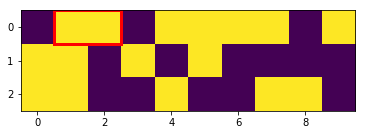

In [36]:
print('Feature: ')
print(tmpResult['Brief'].head(1).reset_index(drop=True, inplace=False))
print('Class: ', y_train[0])
YinsDL.plotOneImage(
    initialPosX = 0.5,
    initialPosY = -0.5,
    boxWidth    = 2,
    boxHeight   = 1,
    linewidth   = 3,
    edgecolor   = 'r',
    IMAGE       = np.reshape(np.array(X_train_cp.head(1)), (3, 10)))

Feature: 
       Modules      Score
0  [[2, 3, 4]]  17.447133
Class:  0


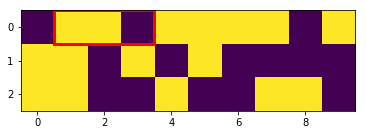

In [37]:
print('Feature: ')
print(pd.DataFrame([tmpResult['Brief'].iloc[1]]).reset_index(drop=True, inplace=False))
print('Class: ', y_train[1])
YinsDL.plotOneImage(
    initialPosX = 0.5,
    initialPosY = -0.5,
    boxWidth    = 3,
    boxHeight   = 1,
    linewidth   = 3,
    edgecolor   = 'r',
    IMAGE       = np.reshape(np.array(X_train_cp.head(1)), (3, 10)))

The data extracted are $[X_1, X_2]$ and also $[X_2, X_3, X_4]$ which looks like the following. We can print the **head()** which has the first five observations (rows) of the data. The columns named "0" are engineered feature by the variable module on their left.

In [19]:
tmpResult['New Data'].head()

,1,2,0,2,3,4,0
0,1,0,0.721670,0,0,0,0.303150
1,1,1,0.220000,1,1,0,0.262357
2,0,1,0.742366,1,0,0,0.769874
3,1,1,0.220000,1,1,1,0.732283
4,0,1,0.742366,1,1,1,0.732283


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    tmpResult['New Data'], y, 
    test_size=cutoff, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train[:5])


(1000, 7) (1000, 7)
[0 0 0 0 0]


Tensorflow Version:
2.0.0
Summary of Network Architecture:
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 130       
Total params: 9,410
Trainable params: 9,410
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 0s 221us/sample - loss: 0.5507 - accuracy: 0.7500
Epoch 2/10
1000/1000 [==============================] - 0s 67us/sample - loss: 0.4288 - accuracy: 0.7820
Epoch 3/10
1000/1000 [==============================] - 0s 83us/sample - loss: 0.3946 - ac

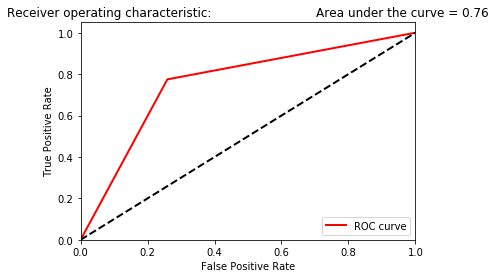

In [23]:
testresult = YinsDL.NN3_Classifier(
    X_train, y_train, X_test, y_test, 
    l1_act='relu', l2_act='relu', l3_act='softmax',
    layer1size=128, layer2size=64, layer3size=2,
    num_of_epochs=10, plotROC=True, verbose=True)

We hit 75% and this is the correct theoretical prediction.

The script ends here.